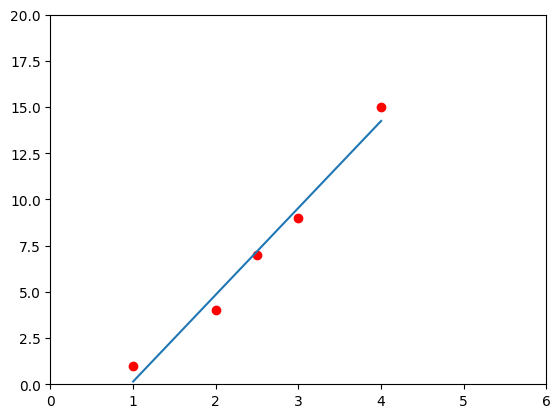

In [191]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [192]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.v2.feature_column as fc

import tensorflow as tf

dftrain = pd.read_csv('./datasets/core-algorithms/train.csv')
dfeval = pd.read_csv('./datasets/core-algorithms/test.csv')
gender_csv = pd.read_csv('./datasets/core-algorithms/gender_submission.csv')



In [193]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [194]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
dftrain.shape

(891, 12)

In [196]:
dftrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [197]:
# Clean the data

# convert the age column to a number
dftrain['Age'] = dftrain['Age'].fillna(dftrain['Age'].mean())
dftrain['Age'] = dftrain['Age'].astype(int)


dftrain.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


<Axes: >

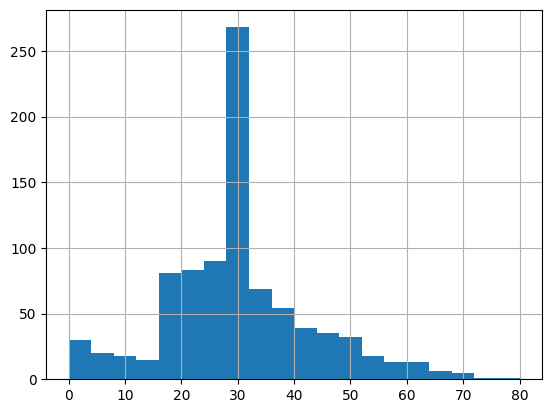

In [198]:
dftrain.Age.hist(bins=20)

<Axes: ylabel='Sex'>

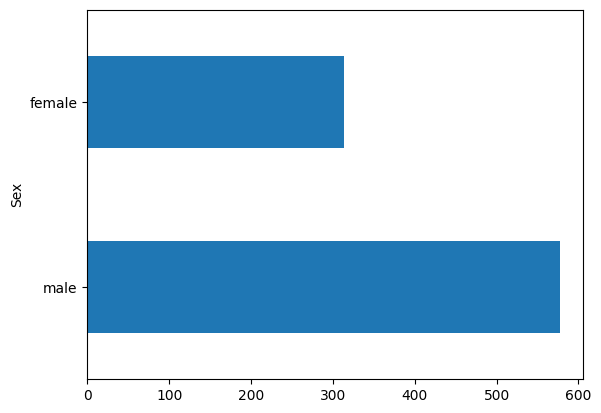

In [199]:
dftrain.Sex.value_counts().plot(kind='barh')

<Axes: ylabel='Embarked'>

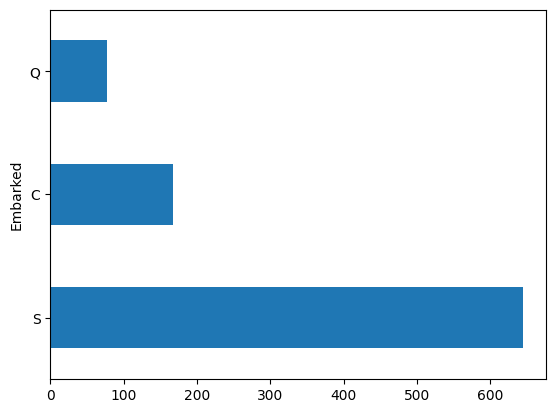

In [200]:
dftrain['Embarked'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

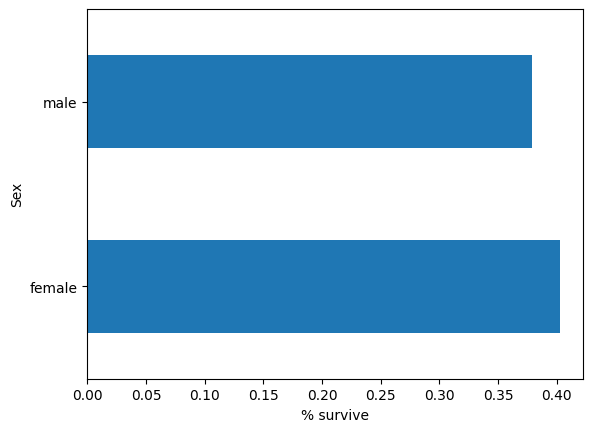

In [201]:
pd.concat([dftrain, y_train], axis=1).groupby('Sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_eval= train_test_split(dftrain, test_size=0.2, random_state=42)

X_train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,NaN,S


In [203]:
X_train['Embarked'].value_counts()

Embarked
S    525
C    125
Q     60
Name: count, dtype: int64

In [205]:
Y_train = X_train['Survived']
Y_Eval = X_eval['Survived']

dropped_columns = ['Survived', 'Name', 'Ticket', 'Cabin']

X_train = X_train.drop(dropped_columns, axis=1, inplace=True)
X_eval = X_eval.drop(dropped_columns, axis=1, inplace=True)

# X_train['Embarked'] = X_train['Embarked'].fillna('S')
# X_eval['Embarked'] = X_eval['Embarked'].fillna('S')

Y_train.head()

TypeError: 'NoneType' object is not subscriptable

In [1]:
import keras
import tensorflow as tf

# convert feature columns to tensors
tensor_columns = {
    'sex' : keras.Input(shape=(1,), dtype=tf.string),
    'n_siblings_spouses' : keras.Input(shape=(1,), dtype=tf.float32),
    'parch' : keras.Input(shape=(1,), dtype=tf.float32),
    'class' : keras.Input(shape=(1,), dtype=tf.string),
    'deck' : keras.Input(shape=(1,), dtype=tf.string),
    'embark_town' : keras.Input(shape=(1,), dtype=tf.string),
    'alone' : keras.Input(shape=(1,), dtype=tf.string),
    'age' : keras.Input(shape=(1,), dtype=tf.float32),
    'fare' : keras.Input(shape=(1,), dtype=tf.float32)

}

# feature_layers = keras.layers.Concatenate(feature_columns)(tensor_columns)
# layers = keras.layers.concatenate(feature_columns)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(optimizer='adam',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# model.fit(train_dataset)